In [3]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import Imputer, scale
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn import tree
import operator
%matplotlib inline 

# 1.Load in data

In [4]:
df = pd.read_csv('crime.csv', names=['communityname', 'State', 'countyCode', 'communityCode', 'fold',\
                                     'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',\
                                     'pct12', 'pct12', 'pct16', 'pct65up', 'persUrban', 'pctUrban',\
                                     'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec',\
                                     'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap',\
                                     'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap',\
                                     'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad',\
                                     'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ',\
                                     'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar',\
                                     'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par',\
                                     'pctKids', 'pct12', 'pctWorkMom', 'pctWorkMom', 'kidsBornNevrMarr',\
                                     'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig', 'pctFgnImmig',\
                                     'pctFgnImmig', 'pctFgnImmig', 'pctImmig', 'pctImmig', 'pctImmig',\
                                     'pctImmig', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam',\
                                     'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup',\
                                     'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm',\
                                     'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded',\
                                     'pctVacant6up', 'medYrHousBuilt', 'pctHousWOphone', 'pctHousWOplumb',\
                                     'ownHousLowQ', 'ownHousMed', 'ownHousUperQ', 'ownHousQrange', 'rentLowQ',\
                                     'rentMed', 'rentUpperQ', 'rentQrange', 'medGrossRent', 'medRentpctHousInc',\
                                     'medOwnCostpct', 'medOwnCostPctWO', 'persEmergShelt', 'persHomeless',\
                                     'pctForeignBorn', 'pctBornStateResid', 'pctSameHouse', 'pctSameCounty',\
                                     'pctSameState', 'numPolice', 'policePerPop', 'policeField',\
                                     'policeFieldPerPop', 'policeCalls', 'policCallPerPop', 'policCallPerOffic',\
                                     'policePerPop2', 'racialMatch', 'pctPolicWhite', 'pctPolicBlack',\
                                     'pctPolicHisp', 'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits',\
                                     'numDiffDrugsSeiz', 'policAveOT', 'landArea', 'popDensity', 'pctUsePubTrans',\
                                     'policCarsAvail', 'policOperBudget', 'pctPolicPatrol', 'gangUnit',\
                                     'pctOfficDrugUnit', 'policBudgetPerPop', 'murders', 'murdPerPop', 'rapes',\
                                     'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop',\
                                     'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',\
                                     'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop'])
df.head()

,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


# 2. Pre-processing of data

## 2.1 Separate categorical and numerical columns

In [5]:
text = df[['communityname', 'State']]
text.head()

,communityname,State
0,BerkeleyHeightstownship,NJ
1,Marpletownship,PA
2,Tigardcity,OR
3,Gloversvillecity,NY
4,Bemidjicity,MN


In [6]:
number = df.drop(['communityname', 'State'],1)
number = number.replace({'?': np.nan})
number = number.astype(float)
number_columns = number.columns
number.head()

,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,95.81,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,86.46,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,75.72,...,274,758.14,1797,4972.19,136,376.30,22,60.87,218.59,6167.51
3,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,67.43,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,7,5068,1,11245,2.76,0.53,89.16,1.17,0.52,79.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79


## 2.2 Imputation of missing values

In [7]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(number)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

- In sklearn package, the Imputer class provides basic strategies for imputing missing values, either using the mean, the median or the most frequent value of the row or column in which the missing values are located. This class also allows for different missing values encodings.

- The following step is to impute missing values using the mean value of the columns (axis 0) that contain the missing values:

In [8]:
transformed = pd.DataFrame(imp.transform(number))
transformed.columns = number_columns
transformed.head()

,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,39.000000,5320.000000,1,11980,3.10,1.37,91.78,6.50,1.88,95.81,...,14,114.85,138,1132.08,16,131.26,2.000000,16.410000,41.020000,1394.590000
1,45.000000,47616.000000,1,23123,2.82,0.80,95.57,3.44,0.85,86.46,...,57,242.37,376,1598.78,26,110.55,1.000000,4.250000,127.560000,1955.950000
2,65.587525,45209.251261,1,29344,2.43,0.74,94.33,3.43,2.35,75.72,...,274,758.14,1797,4972.19,136,376.30,22.000000,60.870000,218.590000,6167.510000
3,35.000000,29443.000000,1,16656,2.40,1.70,97.35,0.50,0.70,67.43,...,225,1301.78,716,4142.56,47,271.93,30.907721,32.153682,306.640000,4908.241804
4,7.000000,5068.000000,1,11245,2.76,0.53,89.16,1.17,0.52,79.17,...,91,728.93,1060,8490.87,91,728.93,5.000000,40.050000,589.078922,9988.790000


# 3. Principal Component Analysis (PCA)

## 3.1 Drop target columns

In [9]:
violent = transformed['violentPerPop']
non_violent = transformed['nonViolPerPop']
features = transformed.drop(['violentPerPop','nonViolPerPop'],1)
features.head()

,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop
0,39.000000,5320.000000,1,11980,3.10,1.37,91.78,6.50,1.88,95.81,...,4,32.81,14,114.85,138,1132.08,16,131.26,2.000000,16.410000
1,45.000000,47616.000000,1,23123,2.82,0.80,95.57,3.44,0.85,86.46,...,24,102.05,57,242.37,376,1598.78,26,110.55,1.000000,4.250000
2,65.587525,45209.251261,1,29344,2.43,0.74,94.33,3.43,2.35,75.72,...,14,38.74,274,758.14,1797,4972.19,136,376.30,22.000000,60.870000
3,35.000000,29443.000000,1,16656,2.40,1.70,97.35,0.50,0.70,67.43,...,33,190.93,225,1301.78,716,4142.56,47,271.93,30.907721,32.153682
4,7.000000,5068.000000,1,11245,2.76,0.53,89.16,1.17,0.52,79.17,...,14,112.14,91,728.93,1060,8490.87,91,728.93,5.000000,40.050000


## 3.2 Variables standardization

- Standardization of datasets is a common requirement for many machine learning estimators implemented in the scikit; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
- In PCA, the results depend on the scaling of your data

In [10]:
features = pd.DataFrame(scale(features))
features.columns = number_columns[:-2]
features.head()

,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop
0,-3.369994e-01,-2.346656e+00,-1.564737,-0.201091,1.175511,-0.559192,0.475175,0.856235,-0.416149,1.957769,...,-0.162757,-0.790188,-0.240355,-1.204435,-0.263327,-1.179670,-0.153812,-0.679688,-0.163927,-4.098068e-01
1,-2.609488e-01,1.415873e-01,-1.564737,-0.146622,0.337299,-0.599209,0.706056,0.172105,-0.486762,1.055514,...,-0.152664,-0.631690,-0.226523,-1.037232,-0.231985,-0.933986,-0.150740,-0.720762,-0.169598,-7.263307e-01
2,1.801239e-16,4.280394e-16,-1.564737,-0.116212,-0.830211,-0.603422,0.630518,0.169869,-0.383928,0.019127,...,-0.157711,-0.776613,-0.156724,-0.360958,-0.044857,0.841868,-0.116948,-0.193700,-0.050513,7.474836e-01
3,-3.876998e-01,-9.275173e-01,-1.564737,-0.178234,-0.920020,-0.536025,0.814491,-0.485197,-0.497046,-0.780840,...,-0.148123,-0.428234,-0.172485,0.351858,-0.187211,0.405128,-0.144289,-0.400697,0.000000,1.849537e-16
4,-7.426024e-01,-2.361481e+00,-1.564737,-0.204684,0.157682,-0.618165,0.315569,-0.335403,-0.509386,0.352045,...,-0.157711,-0.608593,-0.215587,-0.399258,-0.141911,2.694196,-0.130772,0.505671,-0.146915,2.055406e-01


## 3.3 Dimension Reduction
PCA transformation on 0-to-1 standardized data

In [11]:
pca = decomposition.PCA()
pca.fit(features)

PCA(copy=True, n_components=None, whiten=False)

- PCA is linear dimensionality reduction using Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.
- Based on the plot of explained variance ratio, we found that 10 variables is probably a good size to explain the data.

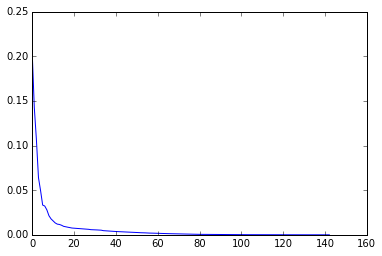

In [12]:
plt.plot(pca.explained_variance_ratio_)

In [123]:
pca = decomposition.PCA(n_components=10)
pca.fit(features)
pca_predictors = pd.DataFrame(pca.fit_transform(features))
pca_predictors.head()

,0,1,2,3,4,5,6,7,8,9
0,-10.276373,5.392830,-1.673907,0.996379,-2.777605,-1.522864,0.435526,2.770973,-0.336714,-0.901242
1,-6.506566,1.354808,1.429044,1.749654,-2.449612,0.738503,-0.648338,1.886793,0.179910,0.649991
2,-2.416704,0.107430,1.065563,-2.196734,2.752983,0.017122,0.206933,-2.360425,-0.716183,1.141555
3,3.586097,-4.598756,3.368021,1.300073,-2.582749,1.731661,-0.428487,0.361708,1.340581,0.474312
4,4.121607,-2.877136,0.192498,-2.386028,3.752377,0.891107,-2.234091,4.642691,0.624352,0.001474


# 4. Classification Modeling

## 4.1 Prepare variables

- base predictors: columns regarding population; ethnicity; age; income; and, education
- PCA transformed predictors

In [124]:
base = number[['pop','pctBlack','pctWhite','pctAsian','pctHisp','pct12',\
               'pct12','pct16','pct65up','perCapInc','pctLowEdu','pctNotHSgrad','pctCollGrad']]

In [125]:
predictors = pd.concat([base, pca_predictors], axis=1)
predictors.head()

,pop,pctBlack,pctWhite,pctAsian,pctHisp,pct12,pct12,pct12,pct12,pct12,...,0,1,2,3,4,5,6,7,8,9
0,11980,1.37,91.78,6.50,1.88,95.81,95.81,95.81,95.81,95.81,...,-10.276373,5.392830,-1.673907,0.996379,-2.777605,-1.522864,0.435526,2.770973,-0.336714,-0.901242
1,23123,0.80,95.57,3.44,0.85,86.46,86.46,86.46,86.46,86.46,...,-6.506566,1.354808,1.429044,1.749654,-2.449612,0.738503,-0.648338,1.886793,0.179910,0.649991
2,29344,0.74,94.33,3.43,2.35,75.72,75.72,75.72,75.72,75.72,...,-2.416704,0.107430,1.065563,-2.196734,2.752983,0.017122,0.206933,-2.360425,-0.716183,1.141555
3,16656,1.70,97.35,0.50,0.70,67.43,67.43,67.43,67.43,67.43,...,3.586097,-4.598756,3.368021,1.300073,-2.582749,1.731661,-0.428487,0.361708,1.340581,0.474312
4,11245,0.53,89.16,1.17,0.52,79.17,79.17,79.17,79.17,79.17,...,4.121607,-2.877136,0.192498,-2.386028,3.752377,0.891107,-2.234091,4.642691,0.624352,0.001474


## 4.2 prepare training and testing data

In [126]:
average_violent = sum(violent)/len(violent)
print 'The average of ViolentCrimesPerPop is', average_violent

average_nonviolent = sum(non_violent)/len(non_violent)
print 'The average of NonViolentCrimesPerPop is', average_nonviolent

The average of ViolentCrimesPerPop is 589.078921765
The average of NonViolentCrimesPerPop is 4908.24180359


In [127]:
target_violent = []
for i in violent:
    [target_violent.append(1) if i > average_violent else target_violent.append(0)]
print 'Based on the average ViolentCrimesPerPop, target is divided to two categories in format', target_violent[:15]

target_nonviolent = []
for i in non_violent:
    [target_nonviolent.append(1) if i > average_nonviolent else target_nonviolent.append(0)]
print 'Based on the average ViolentCrimesPerPop, target is divided to two categories in format', target_nonviolent[:15]

Based on the average ViolentCrimesPerPop, target is divided to two categories in format [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
Based on the average ViolentCrimesPerPop, target is divided to two categories in format [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [128]:
print 'The shape of predictors is', predictors.shape

The shape of predictors is (2215, 27)


In [129]:
offset = 2215*3/4
print 'Training and testing data are cut at the first three-fourths position, which is', offset

Training and testing data are cut at the first three-fourths position, which is 1661


In [130]:
training_x = predictors[:offset]
testing_x = predictors[offset:]
training_violent_y = target_violent[:offset]
testing_violent_y = target_violent[offset:]
training_nonviolent_y = target_nonviolent[:offset]
testing_nonviolent_y = target_nonviolent[offset:]

## 4.3 Training and testing

### 4.3.1 ViolentCrimesPerPop

In [145]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_x, training_violent_y)
predict_y = clf.predict(testing_x)

In [146]:
true = 0
false = 0
for i in range(len(predict_y)):
    if predict_y[i] == testing_violent_y[i]:
        true += 1
    else:
        false += 1
print 'Number of false predictions:',false,'\n','Number of true predictions:',true,'\n',
'The accuracy of this one fold varified tree is:',true*1.0/(true+false)

Number of false predictions: 109 
Number of true predictions: 445 


('The accuracy of this one fold varified tree is:', 0.8032490974729242)

### 4.3.2 nonViolPerPop

In [72]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(training_x, training_nonviolent_y)
predict_y = clf2.predict(testing_x)

In [73]:
true = 0
false = 0
for i in range(len(predict_y)):
    if predict_y[i] == testing_nonviolent_y[i]:
        true += 1
    else:
        false += 1
print 'Number of false predictions:',false,'\n','Number of true predictions:',true,'\n',
'The accuracy of this one fold varified tree is:',true*1.0/(true+false)

Number of false predictions: 138 
Number of true predictions: 416 


('The accuracy of this one fold varified tree is:', 0.7509025270758123)

## 4.4 Feature importances

In [85]:
importance = {}
for i in range(27):
    importance[predictors.columns[i]] = clf.feature_importances_[i]
sorted_importance = sorted(importance.items(), key=operator.itemgetter(1), reverse = True)

So the importance level for the selected features are listed in order below:

### 4.4.1 ViolentCrimesPerPop

In [86]:
for x,y in sorted_importance:
    print x,'\t\t',y

0 		0.427282424631
pctWhite 		0.102831070003
3 		0.0568909449496
pctLowEdu 		0.0425798646963
4 		0.0354841108243
pctCollGrad 		0.0338381634103
5 		0.0320730690656
8 		0.0309771157415
pct16 		0.027883244464
1 		0.0264615956966
6 		0.0253847825563
2 		0.0246461845009
pctBlack 		0.021232910345
perCapInc 		0.0211839116314
9 		0.0211012446209
pop 		0.0129225640965
pctHisp 		0.0114726352948
pctAsian 		0.00926505452034
7 		0.00885719740887
pctNotHSgrad 		0.00506042449477
pct65up 		0.00415738578022
pct12 		0.00374846258872


### 4.4.1 ViolentCrimesPerPop

In [78]:
importance = {}
for i in range(27):
    importance[predictors.columns[i]] = clf2.feature_importances_[i]
sorted_importance = sorted(importance.items(), key=operator.itemgetter(1), reverse = True)

In [79]:
for x,y in sorted_importance:
    print x,'\t\t',y

0 		0.384199655772
6 		0.0813506924903
3 		0.0583838999127
pctWhite 		0.0503327885928
pctNotHSgrad 		0.0437165150972
pctCollGrad 		0.040994796232
8 		0.0383638158723
2 		0.0336344207445
perCapInc 		0.0309292801092
pop 		0.0301830532743
4 		0.0255026971743
pctLowEdu 		0.0236322754687
pctAsian 		0.0225192094662
7 		0.0223460119517
5 		0.0215274155666
pctHisp 		0.018248395687
pct16 		0.0164615261117
pct65up 		0.0108316785841
1 		0.0105213948169
pct12 		0.00942356036819
9 		0.00717390664116
pctBlack 		0.00358183916816


# 5. Conclusion
Predictor 0, which results from the PCA transformed data, is the most important variable for both Crime and Non Crime classification analysis. Aside from that, pctWhite and pctCollGrad appear to be two important variables to the model.